In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web

%config InlineBackend.figure_format = 'retina'

## Get data

In [2]:
ticker = 'AAPL'
start_date = '2020-01-01'
end_date = '2020-12-01'

df = web.DataReader(ticker, 'yahoo', start=start_date, end=end_date)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,73.840042
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.122154
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,73.704819
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.358185
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,74.538239


In [3]:
prices = df[['Adj Close']].copy()

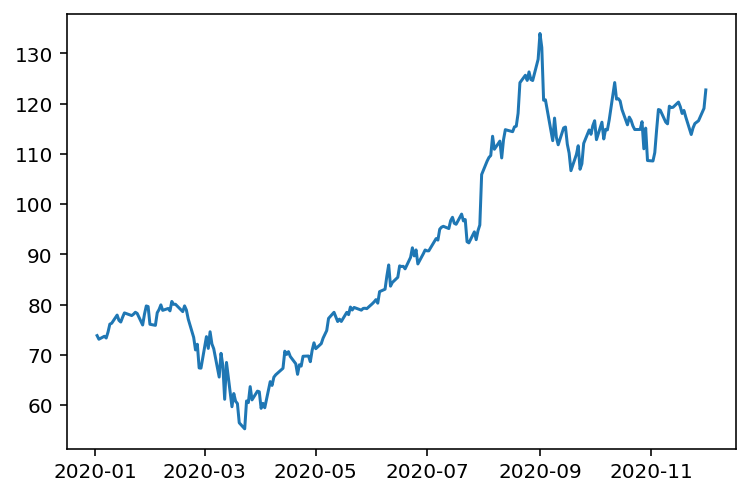

In [4]:
plt.plot(prices.index, prices['Adj Close'])

### Daily return

In [5]:
prices['Return'] = prices['Adj Close'].pct_change().values
prices.head()

,Adj Close,Return
Date,,
2020-01-02,73.840042,NaN
2020-01-03,73.122154,-0.009722
2020-01-06,73.704819,0.007968
2020-01-07,73.358185,-0.004703
2020-01-08,74.538239,0.016086


### Volatility

In [6]:
vol = prices['Return'].std()
vol

0.030330551761188238

### Growth rate

In [7]:
growth = prices['Adj Close'][-1] / prices['Adj Close'][0]
days = (prices.index[-1] - prices.index[0]).days
timeframe = days / 365
annual_growth = (growth ** (1/timeframe)) - 1

### Distribution and Markov Chain

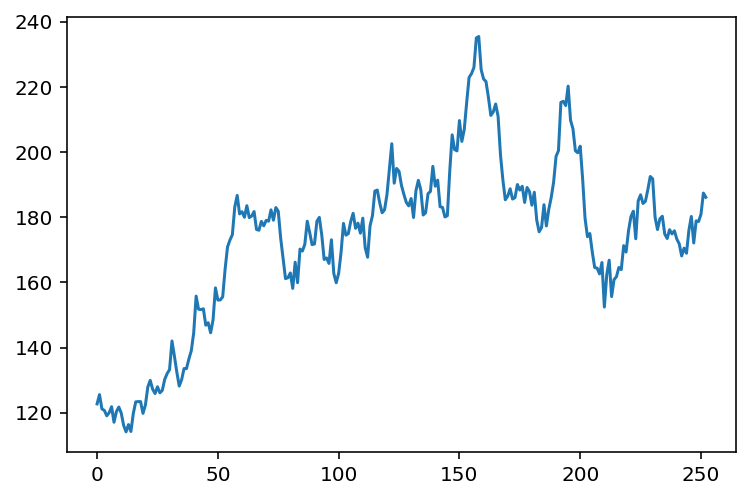

In [15]:
mu = annual_growth / 252
rand_returns = np.random.normal(mu, vol, 252) + 1
res = [prices['Adj Close'][-1]]

for r in rand_returns:
    res.append(res[-1] * r)
    
plt.plot(range(len(res)), res)
plt.show()

### Monte Carlo

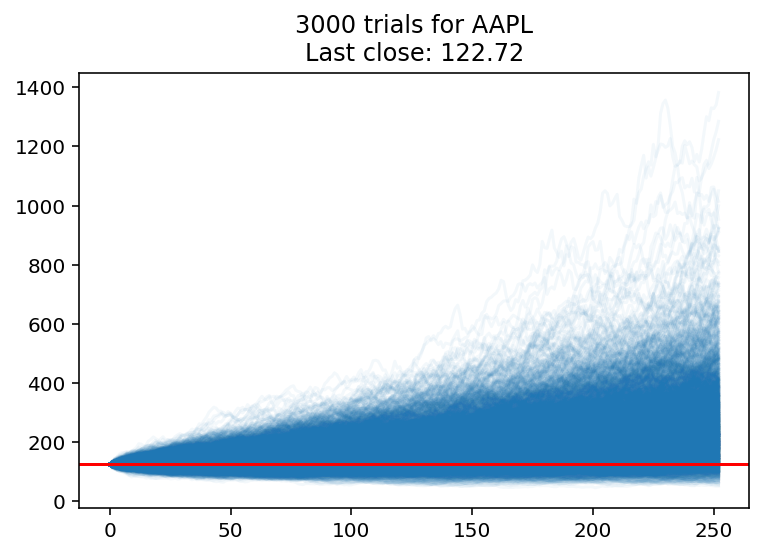

In [9]:
trials = 3000
mu = annual_growth / 252
last_close = prices['Adj Close'][-1]

end_prices = []
for _ in range(trials):
    rand_returns = np.random.normal(mu, vol, 252) + 1
    res = [last_close]

    for r in rand_returns:
        res.append(res[-1] * r)
        
    end_prices.append(res[-1])
    plt.plot(range(len(res)), res, c='tab:blue', alpha=0.05)
    
plt.axhline(last_close, c='red', label='last close')
plt.title(f'{trials} trials for {ticker}\nLast close: {last_close:.2f}')
plt.show()

### Probability of profit

In [10]:
sum(end_prices > last_close) / trials

0.9076666666666666

In [11]:
print(f'Last close: {last_close}, Average simulated close: {np.mean(end_prices)}')

Last close: 122.72000122070312, Average simulated close: 259.81099057074465
